# **Test For MacPaw**
## data science 

# **import libs**

In [1]:

%matplotlib inline


import math, time, random, datetime


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## **import data**

In [2]:
train = pd.read_csv('msi2021-data-science/data/train.csv')
test= pd.read_csv('msi2021-data-science/data/test.csv')
test_submit =  pd.read_csv('msi2021-data-science/data/sample_prediction.csv')

In [3]:
test_submit.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# **Check columns**

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [6]:
train.describe()

train['SalePrice'] = train['SalePrice'].astype('float64')

# **Start Exploring Data**
>***describe NaN vlues map***




<AxesSubplot:>

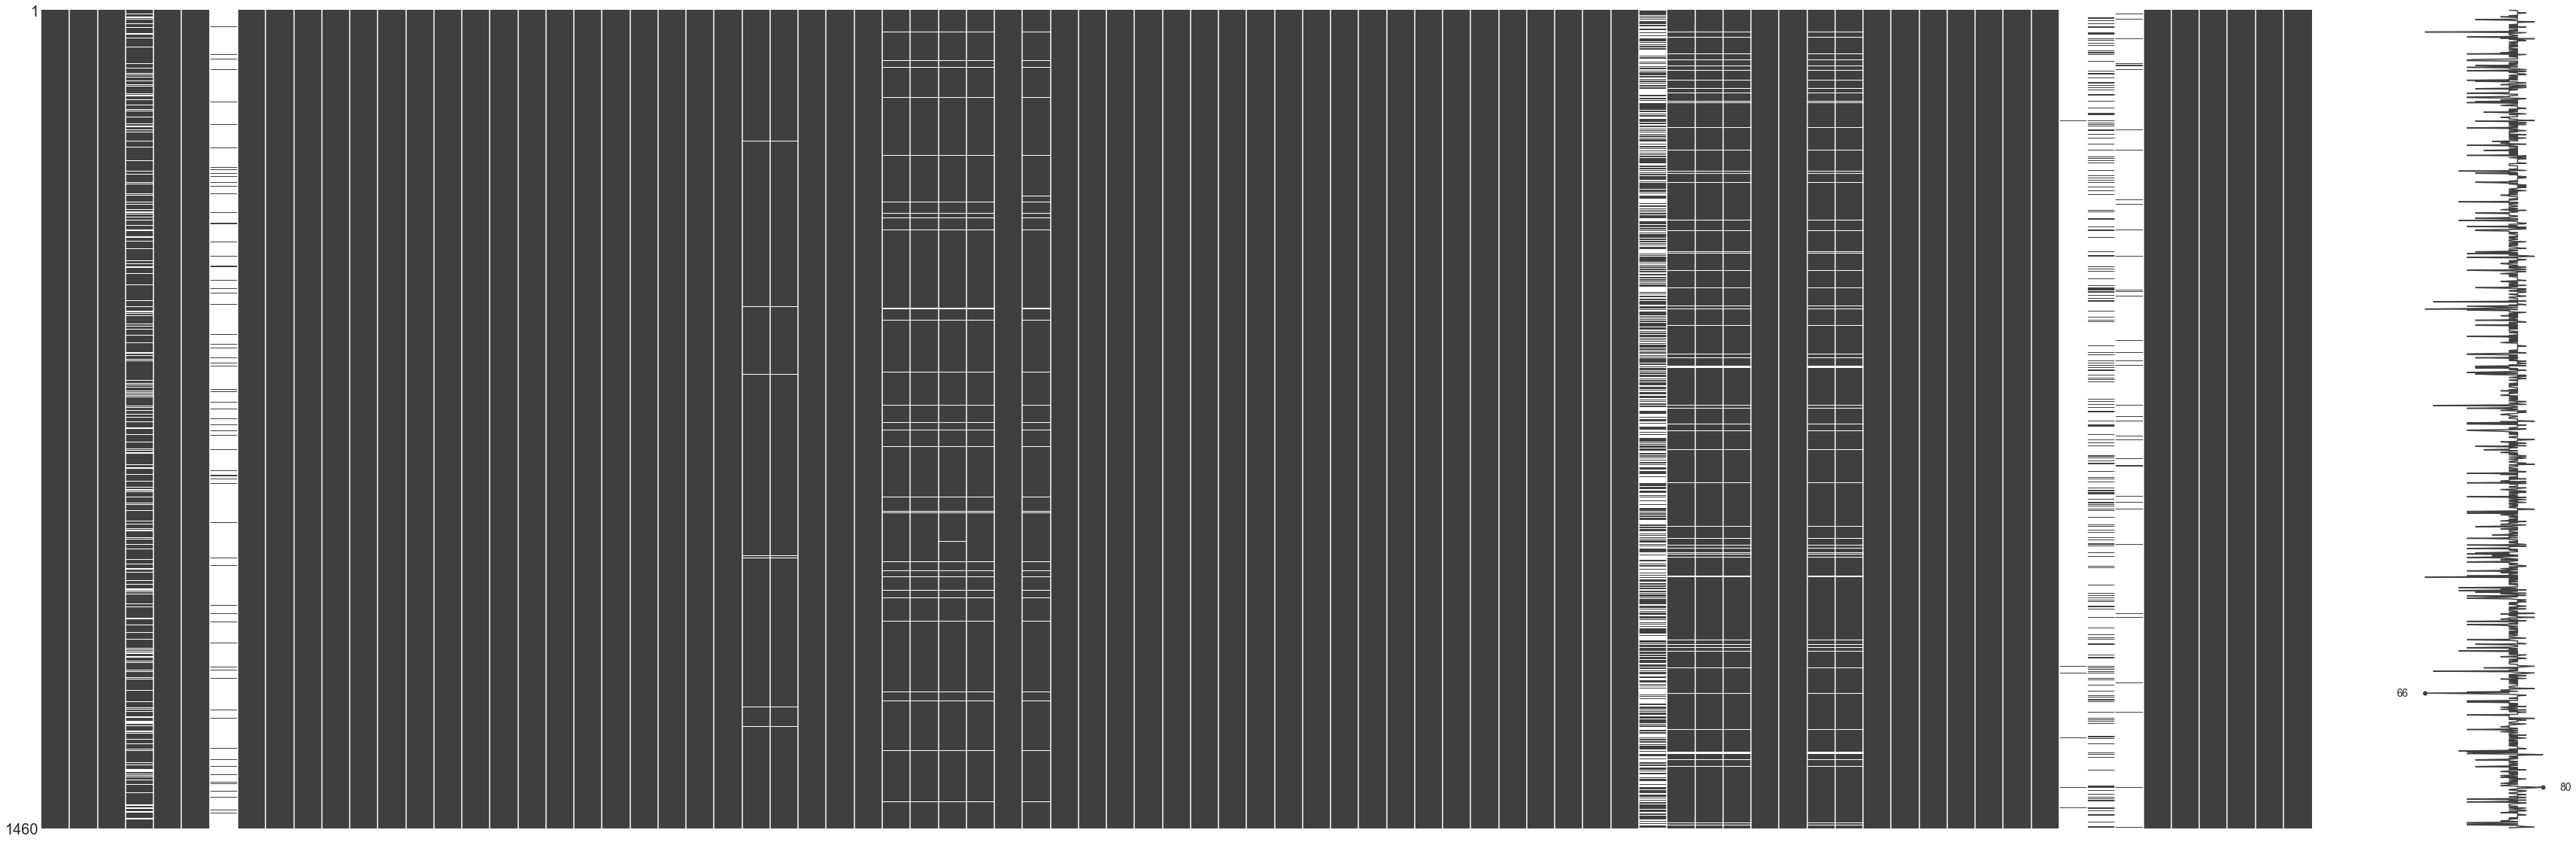

In [7]:
missingno.matrix(train, figsize = (60,20))

>***find NaN vlues count by column***


In [8]:
miss = [ column for column in zip(train.columns,train.isnull().sum())]

sorted(miss,key=lambda col: col[1],reverse=True)

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1),
 ('Id', 0),
 ('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('H

# **Miss function**
>***define helpfull func to map count by column miss values***


In [9]:
def get_miss(train):
    miss = [ column for column in zip(train.columns,train.isnull().sum())]
    return miss

> ***describe data set***

In [10]:
for col in miss:
    if col[1]>0:
        print(train[col[0]].describe(),'\n',col,'\n')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 
 ('LotFrontage', 259) 

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object 
 ('Alley', 1369) 

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object 
 ('MasVnrType', 8) 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 
 ('MasVnrArea', 8) 

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object 
 ('BsmtQual', 37) 

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object 
 ('BsmtCond', 37) 

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object 
 ('BsmtExpos

In [11]:
print(train.BsmtExposure.unique())

['No' 'Gd' 'Mn' 'Av' nan]


<AxesSubplot:ylabel='Frequency'>

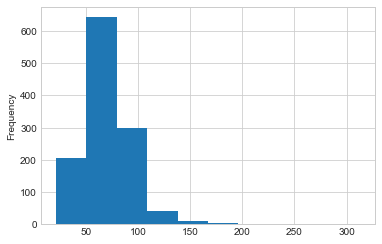

In [12]:
train.LotFrontage.plot.hist()


<AxesSubplot:ylabel='Frequency'>

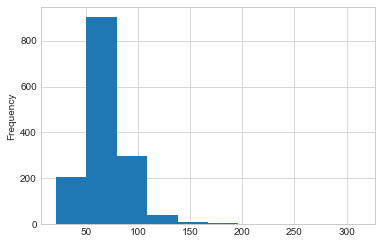

In [13]:
LotFrontage_mean  = train.LotFrontage.mean
train['LotFrontage'] =train.LotFrontage.fillna((train.LotFrontage.mean()))
train.LotFrontage.plot.hist()

In [14]:
train.LotFrontage.isnull().sum()

0

# **Drop NaN Values**
>***I can drop line from columns which have less count of nan values then count of all values***





In [15]:
drop_nan_col =[]
for col in miss:
    if col[1]>0 and col[1] < 200:
        drop_nan_col.append(col[0])
        print(col,'\n')

('MasVnrType', 8) 

('MasVnrArea', 8) 

('BsmtQual', 37) 

('BsmtCond', 37) 

('BsmtExposure', 38) 

('BsmtFinType1', 37) 

('BsmtFinType2', 38) 

('Electrical', 1) 

('GarageType', 81) 

('GarageYrBlt', 81) 

('GarageFinish', 81) 

('GarageQual', 81) 

('GarageCond', 81) 



In [16]:
train  = train.dropna(subset=drop_nan_col)

## **Drop Clumns** 
>***columns where more than half of value are NaN or hrd to reproduce, have more noise them profit information***.
>
>**So the best choise that droped are.**


In [17]:
drop_colums = []
for col in miss:
    if col[1] > 200:
        drop_colums.append(col[0])
        print(col,'\n')


('LotFrontage', 259) 

('Alley', 1369) 

('FireplaceQu', 690) 

('PoolQC', 1453) 

('Fence', 1179) 

('MiscFeature', 1406) 



In [18]:
train.FireplaceQu.describe

<bound method NDFrame.describe of 0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1338, dtype: object>

In [19]:
train_droped  = train.drop(drop_colums,axis='columns',inplace=False)
get_miss(train_droped)



[('Id', 0),
 ('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotArea', 0),
 ('Street', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 0),
 ('MasVnrArea', 0),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 0),
 ('BsmtCond', 0),
 ('BsmtExposure', 0),
 ('BsmtFinType1', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAbvGr', 0),
 (

>**So, this is result of data cleaning**.

<AxesSubplot:>

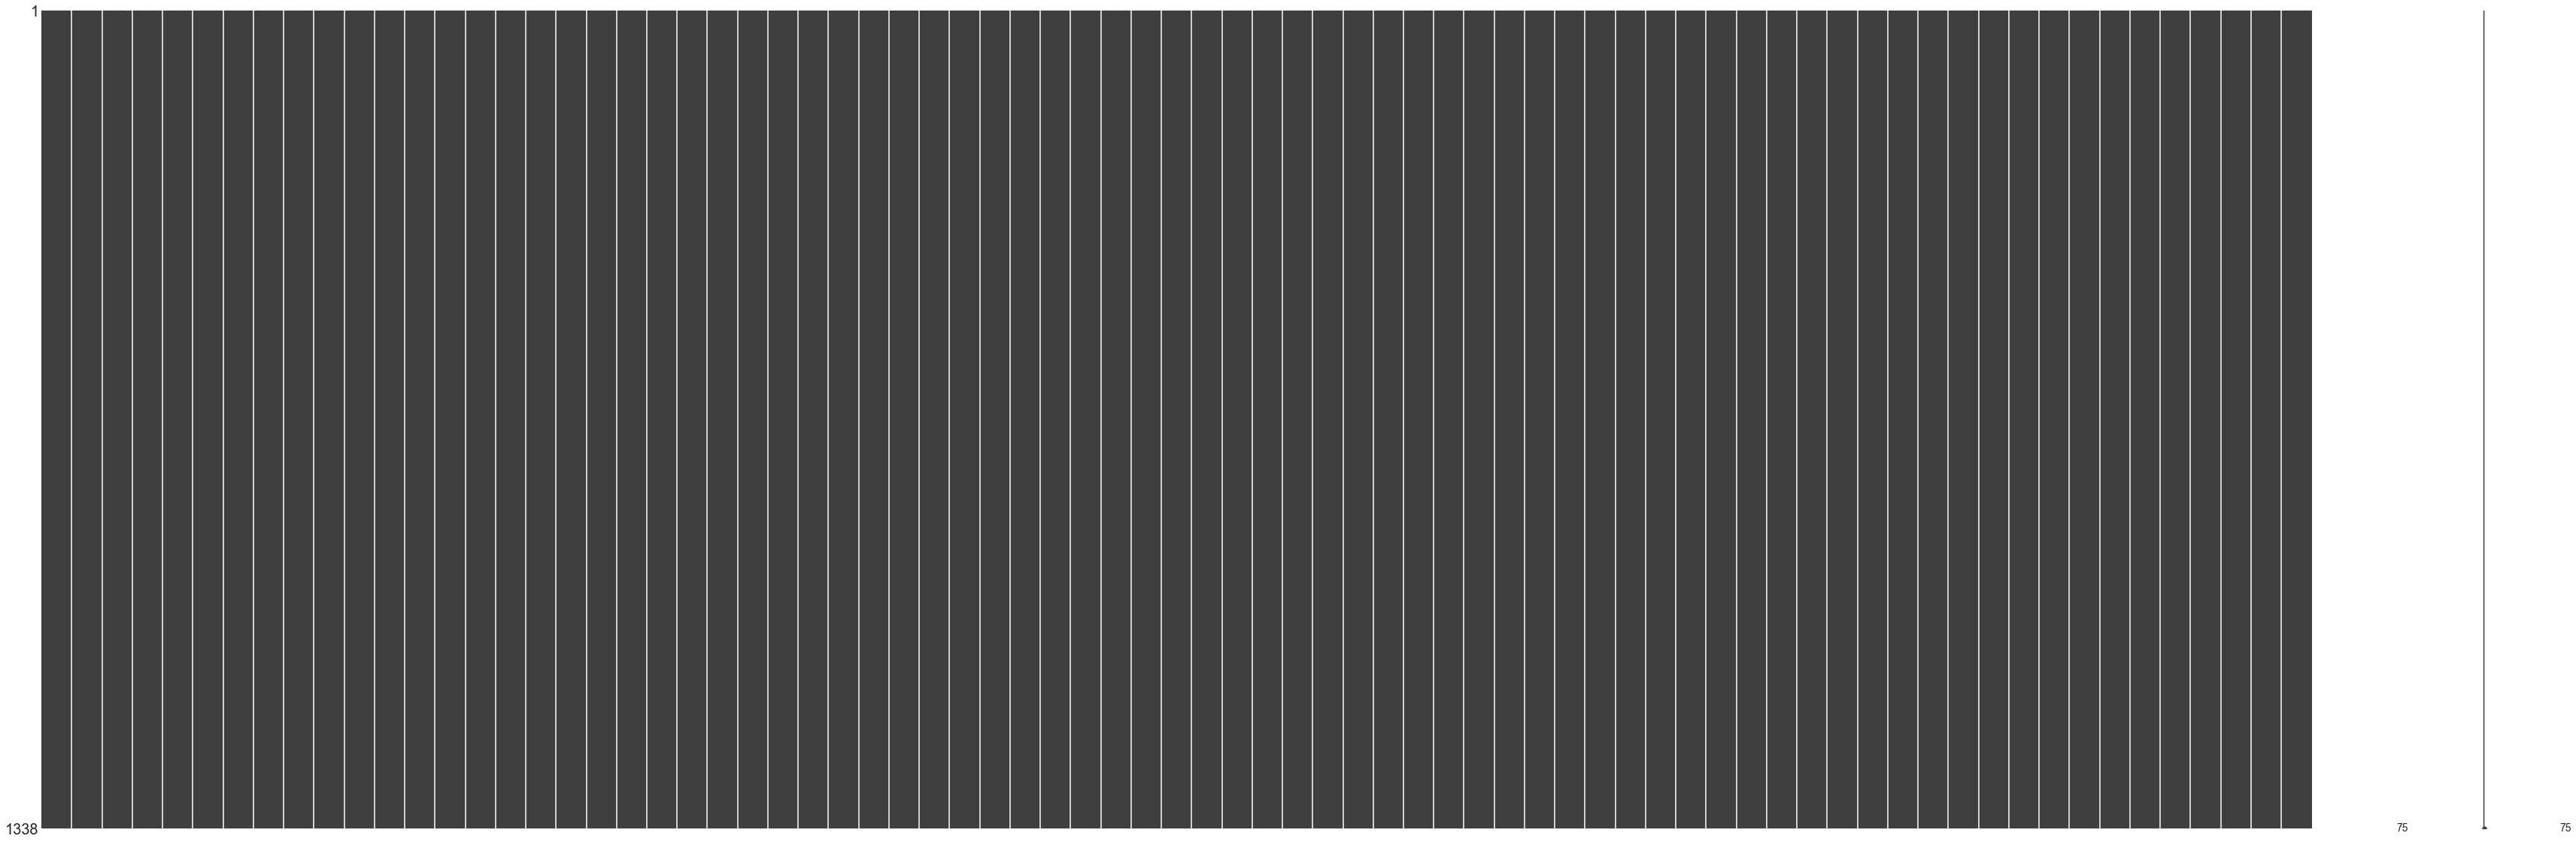

In [20]:
missingno.matrix(train_droped, figsize = (60,20))

# **Start of preparing data to fit.**

In [21]:
train_droped.shape

(1338, 75)

In [22]:
train_droped.dtypes
train_droped.LowQualFinSF.dtype

dtype('int64')

## **Divide data by object and numerical data.**

In [23]:
obj_data = train_droped.loc[:, train_droped.dtypes == object]
num_data = train_droped.loc[:, train_droped.dtypes != object]

In [24]:
for col in obj_data:
    print(obj_data[col].value_counts(),'\n',col,'\n')

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64 
 MSZoning 

Pave    1333
Grvl       5
Name: Street, dtype: int64 
 Street 

Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64 
 LotShape 

Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64 
 LandContour 

AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64 
 Utilities 

Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64 
 LotConfig 

Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64 
 LandSlope 

NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9

# **Replace String Objects To Numeric**

In [25]:
obj_cat_data = []
unique_set ={}

for column in zip(obj_data.columns.values , range(obj_data.shape[1])):
    if len(obj_data[column[0]].value_counts()) <= 5:
        obj_cat_data.append(column[0])
    else:
        unique_set[column[0]] =sorted( list(obj_data[column[0]].unique()))
        

In [26]:
unique_set
obj_num_data = pd.DataFrame()
obj_num_data = pd.concat([obj_num_data ,num_data['Id'].copy()] ,axis=1)
print(obj_num_data.shape)
for colum , arr in unique_set.items():
    print(colum , arr)
    obj_num_data[colum] = [ arr.index(row)  for row in obj_data[colum]]
obj_num_data.shape

(1338, 1)
Neighborhood ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
Condition1 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
Condition2 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']
HouseStyle ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
RoofStyle ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
RoofMatl ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
Exterior1st ['AsbShng', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
Exterior2nd ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'S

(1338, 15)

In [27]:
enc_obj_train =[]
for column in obj_data.columns.values:
    if column in obj_cat_data:
        enc_obj_train.append(pd.get_dummies(obj_data[column], prefix=column))
enc_obj_train.append(obj_num_data)

enc_obj_train_concat = pd.concat(enc_obj_train, axis=1)



# **Describe Numeric Data**

In [28]:
for col in num_data:
    print(num_data[col].describe(),'\n',col,'\n')

count    1338.000000
mean      731.228700
std       421.779691
min         1.000000
25%       366.250000
50%       730.500000
75%      1098.750000
max      1460.000000
Name: Id, dtype: float64 
 Id 

count    1338.000000
mean       56.136024
std        41.252576
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64 
 MSSubClass 

count      1338.000000
mean      10706.294469
std       10336.621126
min        1300.000000
25%        7744.000000
50%        9600.000000
75%       11760.750000
max      215245.000000
Name: LotArea, dtype: float64 
 LotArea 

count    1338.000000
mean        6.219731
std         1.324472
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 
 OverallQual 

count    1338.000000
mean        5.596413
std         1.078124
min         2.000000
25%         5.000000
50%         5.000000
75%         6.

In [29]:

def get_unique(num_data):
    for column in zip(num_data.columns.values , range(num_data.shape[1])):
        print(column[0],len(num_data[column[0]].value_counts()))
    
get_unique(num_data)


Id 1338
MSSubClass 15
LotArea 1000
OverallQual 9
OverallCond 8
YearBuilt 109
YearRemodAdd 61
MasVnrArea 325
BsmtFinSF1 621
BsmtFinSF2 141
BsmtUnfSF 764
TotalBsmtSF 700
1stFlrSF 727
2ndFlrSF 394
LowQualFinSF 16
GrLivArea 822
BsmtFullBath 3
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
TotRmsAbvGrd 10
Fireplaces 4
GarageYrBlt 97
GarageCars 4
GarageArea 435
WoodDeckSF 266
OpenPorchSF 197
EnclosedPorch 109
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 20
MoSold 12
YrSold 5
SalePrice 620


In [30]:
train.shape , num_data.shape
dec_num_data  = num_data.drop(['SalePrice'] ,axis='columns',inplace=False)

>**divide numeric data by two sets where chose what columns will be fife to do categorical encode**

In [31]:
num_cat_data = []
for column in zip(dec_num_data.columns.values , range(dec_num_data.shape[1])):
    print(column[0],len(dec_num_data[column[0]].value_counts()))
    if len(dec_num_data[column[0]].value_counts()) > 10 and len(dec_num_data[column[0]].value_counts()) < 100:
        dec_num_data[column[0]] = pd.cut(dec_num_data[column[0]], bins=5)
        num_cat_data.append(column[0])
    if len(dec_num_data[column[0]].value_counts()) <= 10:
        num_cat_data.append(column[0])

Id 1338
MSSubClass 15
LotArea 1000
OverallQual 9
OverallCond 8
YearBuilt 109
YearRemodAdd 61
MasVnrArea 325
BsmtFinSF1 621
BsmtFinSF2 141
BsmtUnfSF 764
TotalBsmtSF 700
1stFlrSF 727
2ndFlrSF 394
LowQualFinSF 16
GrLivArea 822
BsmtFullBath 3
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
TotRmsAbvGrd 10
Fireplaces 4
GarageYrBlt 97
GarageCars 4
GarageArea 435
WoodDeckSF 266
OpenPorchSF 197
EnclosedPorch 109
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 20
MoSold 12
YrSold 5


Id 1338
MSSubClass 5
LotArea 1000
OverallQual 9
OverallCond 8
YearBuilt 109
YearRemodAdd 5
MasVnrArea 325
BsmtFinSF1 621
BsmtFinSF2 141
BsmtUnfSF 764
TotalBsmtSF 700
1stFlrSF 727
2ndFlrSF 394
LowQualFinSF 5
GrLivArea 822
BsmtFullBath 3
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
TotRmsAbvGrd 10
Fireplaces 4
GarageYrBlt 5
GarageCars 4
GarageArea 435
WoodDeckSF 266
OpenPorchSF 197
EnclosedPorch 109
3SsnPorch 5
ScreenPorch 5
PoolArea 8
MiscVal 5
MoSold 5
YrSold 5


<AxesSubplot:xlabel='count', ylabel='BedroomAbvGr'>

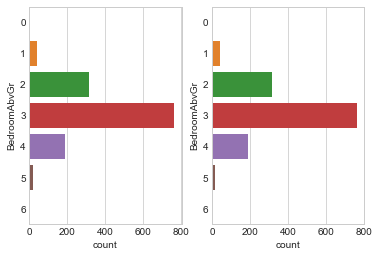

In [32]:
get_unique(dec_num_data)
fig, ax = plt.subplots(1,2)
sns.countplot(y='BedroomAbvGr',data=dec_num_data,ax=ax[0])
sns.countplot(y='BedroomAbvGr',data=num_data,ax=ax[1])


# **Prepares Statement To Fit**

In [33]:
enc_train_data = pd.concat([num_data ,enc_obj_train_concat ], axis=1)

enc_train_data.shape, obj_num_data.shape, 

((1338, 147), (1338, 15))

In [34]:
train_droped.shape, train.shape

((1338, 75), (1338, 81))

# **Define train set**

In [35]:
X_train = enc_train_data.dropna()
y_train = train_droped['SalePrice']
y_train.head()


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [36]:
X_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,Functional,GarageType,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,1,1,11,13,2,5,6,1,8,4
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,1,1,7,8,0,5,6,1,8,4
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,1,1,11,13,2,5,6,1,8,4
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,1,1,12,15,0,5,6,5,8,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,1,1,11,13,2,5,6,1,8,4


# **Preparing test set**

In [37]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [38]:
missa = get_miss(test)
drop_nan_col_test =[]
for col in missa:
    if col[1]>0 and col[1] < 200:
        drop_nan_col_test.append(col[0])
        print(col,'\n')

('MSZoning', 4) 

('Utilities', 2) 

('Exterior1st', 1) 

('Exterior2nd', 1) 

('MasVnrType', 16) 

('MasVnrArea', 15) 

('BsmtQual', 44) 

('BsmtCond', 45) 

('BsmtExposure', 44) 

('BsmtFinType1', 42) 

('BsmtFinSF1', 1) 

('BsmtFinType2', 42) 

('BsmtFinSF2', 1) 

('BsmtUnfSF', 1) 

('TotalBsmtSF', 1) 

('BsmtFullBath', 2) 

('BsmtHalfBath', 2) 

('KitchenQual', 1) 

('Functional', 2) 

('GarageType', 76) 

('GarageYrBlt', 78) 

('GarageFinish', 78) 

('GarageCars', 1) 

('GarageArea', 1) 

('GarageQual', 78) 

('GarageCond', 78) 

('SaleType', 1) 



In [39]:
test  = test.dropna(subset=drop_nan_col_test)

In [40]:
missa = get_miss(test)
drop_colums = []
for col in missa:
    if col[1] > 200:
        drop_colums.append(col[0])
        print(col,'\n')


('LotFrontage', 211) 

('Alley', 1227) 

('FireplaceQu', 622) 

('PoolQC', 1316) 

('Fence', 1050) 

('MiscFeature', 1275) 



In [41]:
test_droped  = test.drop(drop_colums,axis='columns',inplace=False)


In [42]:
obj_data = test_droped.loc[:, test_droped.dtypes == object]
num_data = test_droped.loc[:, test_droped.dtypes != object]

In [43]:
unique_set
obj_num_data = pd.DataFrame()
obj_num_data = pd.concat([obj_num_data ,num_data['Id'].copy()] ,axis=1)

for colum , arr in unique_set.items():
    
    obj_num_data[colum] = [ arr.index(row)  for row in obj_data[colum]]
obj_num_data.shape

(1319, 15)

In [44]:
enc_obj_train =[]
for column in obj_data.columns.values:
    if column in obj_cat_data:
        enc_obj_train.append(pd.get_dummies(obj_data[column], prefix=column))
enc_obj_train.append(obj_num_data)

enc_obj_train_concat = pd.concat(enc_obj_train, axis=1)

enc_obj_train_concat.describe()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,Functional,GarageType,SaleType,SaleCondition
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,...,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.003791,0.052312,0.006823,0.781653,0.155421,0.003033,0.996967,0.349507,0.025019,0.003791,...,1.393480,1.043973,8.633813,10.299469,2.713419,4.630781,5.813495,2.289613,7.483700,3.829416
std,0.061476,0.222741,0.082353,0.413281,0.362443,0.055006,0.055006,0.476995,0.156242,0.061476,...,0.808145,0.445386,3.111013,3.549852,1.779088,1.086959,0.805011,1.792618,1.614943,0.988791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,7.000000,8.000000,2.000000,5.000000,6.000000,1.000000,8.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,11.000000,13.000000,2.000000,5.000000,6.000000,1.000000,8.000000,4.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,11.000000,13.000000,5.000000,5.000000,6.000000,5.000000,8.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,7.000000,13.000000,15.000000,5.000000,5.000000,6.000000,5.000000,8.000000,5.000000


In [45]:
enc_test_data = pd.concat([num_data ,enc_obj_train_concat ], axis=1)

enc_test_data.shape, obj_num_data.shape
enc_test_data.head()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,Functional,GarageType,SaleType,SaleCondition
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,1,11,13,4,3,6,1,8,4
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,3,1,12,14,0,5,6,1,8,4
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,1,11,13,2,5,6,1,8,4
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,1,11,13,2,5,6,1,8,4
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,1,5,6,0,5,6,1,8,4


# **Define test set**

In [46]:

drop_columns  = []
for col in X_train.columns.values:
    if col not in enc_test_data.columns.values:
        drop_columns.append(col)
X_train = X_train.drop(drop_columns,axis='columns',inplace=False )

drop_columns  = []
for col in enc_test_data.columns.values:
    if col not in X_train.columns.values:
        drop_columns.append(col)
enc_test_data = enc_test_data.drop(drop_columns,axis='columns',inplace=False )

# **Fit Function**
>***define helpfull func to fit models with diferent methods***

In [47]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
   
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
  
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv,model

# **Fit model**


In [48]:
start_time = time.time()
train_pred_decision_tree , acc_decision_tree , acc_cv_decision_tree ,model = fit_ml_algo(DecisionTreeClassifier(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                          20)
decision_tree_time = (time.time() - start_time)
print("Accuracy: %s" % acc_decision_tree)
print("Running Time: %s" % datetime.timedelta(seconds=decision_tree_time))

Accuracy: 100.0
Running Time: 0:00:05.151124


# **Make predict**

In [49]:

predictions = model.predict(enc_test_data)
predictions

array([155000., 174000., 187500., ..., 112000., 139000., 310000.])

In [50]:
test_submit.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# **Seve predict** 

In [51]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = predictions # our model predictions on the test dataset
submission.head()

,Id,SalePrice
0,1461,155000.0
1,1462,174000.0
2,1463,187500.0
3,1464,235000.0
4,1465,189000.0


In [52]:
submission.to_csv('prediction/prediction.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [53]:
submissions_check = pd.read_csv("prediction/prediction.csv")
submissions_check.head()

,Id,SalePrice
0,1461,155000.0
1,1462,174000.0
2,1463,187500.0
3,1464,235000.0
4,1465,189000.0
